In [0]:
%matplotlib inline

In [0]:
#Amelia Mason
#Programming Assignment 2
#Program reads the file hiv estimated prevalence% 15-49.csv and outputs multiple graphs
#hiv estimated prevalence% 15-49.csv had to be used as the function read_table()
#cannot read .xlsx files

from datascience import *

#reads file into program
path_data = '/content/indicator '
hiv_est_con = Table.read_table(path_data + 'hiv estimated prevalence% 15-49.csv')

#relabels the country column
hiv_est_con = hiv_est_con.relabeled('Estimated HIV Prevalence% - (Ages 15-49)', 'Country')

#creates a list of corresponding continents for each country
#continents are based on the seven-continent model (Africa, Asia, Australia, Europe, North America, South America, Antartica)
#when the country lies within two continents (ie Russia), the geographically larger region is listed
continents = ['Asia', 'Asia', 'Asia', 'Europe', 'Africa', 'Australia', 'Europe', 'Africa', 'North America',
              'North America', 'South America', 'Asia', 'South America', 'Australia', 'Europe', 'Asia', 'North America',
              'Asia', 'Asia', 'North America', 'Europe', 'Europe', 'North America', 'Africa', 'North America', 'Asia',
              'South America', 'Europe', 'Africa', 'South America', 'North America', 'Asia', 'Europe', 'Africa', 'Africa',
              'Asia', 'Africa', 'North America', 'Africa', 'North America', 'Africa', 'Africa', 'North America', 
              'South America', 'Asia', 'Asia', 'Asia', 'South America', 'Africa', 'Africa', 'Africa', 'Australia',
              'North America', 'Africa', 'Europe', 'North America', 'Asia', 'Europe', 'Europe', 'Europe', 'Africa', 'North America',
              'North America', 'Europe', 'South America', 'Africa', 'South America', 'Africa', 'Africa', 'Africa', 'Europe',
              'Africa', 'Europe', 'South America', 'Australia', 'Europe', 'Europe', 'South America', 'Australia', 'Africa',
              'Africa', 'Europe', 'Europe', 'Africa', 'Europe', 'Europe', 'North America', 'North America', 'North America',
              'Australia', 'North America', 'Europe', 'Africa', 'Africa', 'South America', 'North America', 'Europe',
              'North America', 'Asia', 'Europe', 'Europe', 'Asia', 'Asia', 'Asia', 'Asia', 'Europe', 'Europe', 'Asia',
              'Europe', 'North America', 'Asia', 'Europe', 'Asia', 'Asia', 'Africa', 'Australia', 'Asia', 'Asia', 'Asia', 'Europe',
              'Asia', 'Asia', 'Asia', 'Europe', 'Asia', 'Africa', 'Africa', 'Africa', 'Europe', 'Europe', 'Europe', 'Asia',
              'Europe', 'Africa', 'Africa', 'Asia', 'Asia', 'Africa', 'Europe', 'Australia', 'North America', 'Africa', 'Africa',
              'Africa', 'North America', 'Australia', 'Europe', 'Europe', 'Asia', 'Europe', 'North America', 'Africa',
              'Africa', 'Asia', 'Africa', 'Australia', 'Asia', 'Europe', 'North America', 'Australia', 'Australia', 'Asia', 
              'North America', 'Africa', 'Africa', 'Australia', 'Australia', 'Europe', 'Australia', 'Europe', 'Asia', 'Asia', 
              'Australia', 'North America', 'Australia', 'South America', 'South America', 'Asia', 'Australia', 'Europe', 'Europe',
              'North America', 'Asia', 'Africa', 'Europe', 'Asia', 'Africa', 'North America', 'Africa', 'North America', 'North America',
              'North America', 'North America', 'North America', 'Australia', 'Europe', 'Africa', 'Asia', 'Africa', 'Europe', 'Europe', 
              'Europe', 'Africa', 'Africa', 'Asia', 'Europe', 'Europe', 'Australia', 'Africa', 'Africa', 'Africa', 'Europe', 'Europe', 
              'Asia', 'Africa', 'South America', 'Europe', 'Africa', 'Europe', 'Europe', 'Asia', 'Asia', 'Asia', 'Africa', 'Asia', 
              'Asia', 'Africa', 'Australia', 'Australia', 'Europe', 'South America', 'Africa', 'Asia', 'Asia', 'North America', 
              'Australia', 'Africa', 'Europe', 'Asia', 'Europe', 'North America', 'South America', 'Asia', 'Asia', 'Australia', 
              'Australia', 'South America', 'Asia', 'Europe', 'Africa', 'Asia', 'North America', 'Asia', 'Asia', 'Asia', 'Europe',
              'Africa', 'Africa', 'Europe', 'Africa', 'N/A', 'N/A', 'North America', 'North America', 'North America', 'Antarctica',
              'North America', 'North America', 'Australia','Australia', 'South America', 'Europe', 'Asia', 'North America', 'North America']

#adds column of continents into table
hiv_est_con = hiv_est_con.with_columns('Continent', continents)

#outputs a new .csv file with the continents listed
hiv_est_con.to_df().to_csv('hiv_est_continents.csv', index = False)

Thailand


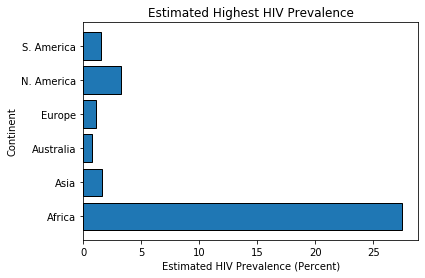

In [6]:
import matplotlib.pyplot as plt

#reads in the newly created hiv_est_continents.csv into a table
path_data = '/content/'
hiv_est = Table.read_table(path_data + 'hiv_est_continents.csv')

#creates a new column named '2000 - 2011 Est Average' which finds the average of
#each country's estimated HIV rate between 2000 and 2011
hiv_est = hiv_est.with_column('2000 - 2011 Est Average', (hiv_est.column('2000')+hiv_est.column('2001')+
          hiv_est.column('2002')+hiv_est.column('2003')+hiv_est.column('2004')+hiv_est.column('2005')+
          hiv_est.column('2006')+hiv_est.column('2007')+hiv_est.column('2008')+hiv_est.column('2009')+
          hiv_est.column('2010')+hiv_est.column('2011'))/11)
hiv_est = hiv_est.where('2000 - 2011 Est Average', are.above(0))

#selects only the needed columns in order to simplify the data
hiv_est = hiv_est.select('Country', 'Continent', '2000 - 2011 Est Average')
hiv_est = hiv_est.sort('2000 - 2011 Est Average', descending=True)

#finds the lowest and highest average in Africa
hiv_est_africa = hiv_est.where('Continent', are.equal_to('Africa'))
africa_highest = hiv_est_africa.column(0).item(0)
hiv_est_africa = hiv_est_africa.sort('2000 - 2011 Est Average', descending=False)
africa_lowest = hiv_est_africa.column(0).item(0)

#finds the lowest and highest average in Asia
hiv_est_asia = hiv_est.where('Continent', are.equal_to('Asia'))
asia_highest = hiv_est_asia.column(0).item(0)
hiv_est_asia = hiv_est_asia.sort('2000 - 2011 Est Average', descending=False)
asia_lowest = hiv_est_asia.column(0).item(0)

#finds the lowest and highest average in Australia
hiv_est_aus = hiv_est.where('Continent', are.equal_to('Australia'))
aus_highest = hiv_est_aus.column(0).item(0)
hiv_est_aus = hiv_est_aus.sort('2000 - 2011 Est Average', descending=False)
aus_lowest = hiv_est_aus.column(0).item(0)

#finds the lowest and highest average in Europe
hiv_est_europe = hiv_est.where('Continent', are.equal_to('Europe'))
europe_highest = hiv_est_europe.column(0).item(0)
hiv_est_europe = hiv_est_europe.sort('2000 - 2011 Est Average', descending=False)
europe_lowest = hiv_est_europe.column(0).item(0)

#finds the lowest and highest average in North America
hiv_est_na = hiv_est.where('Continent', are.equal_to('North America'))
na_highest = hiv_est_na.column(0).item(0)
hiv_est_na = hiv_est_na.sort('2000 - 2011 Est Average', descending=False)
na_lowest = hiv_est_na.column(0).item(0)

#finds the lowest and highest average in South America
hiv_est_sa = hiv_est.where('Continent', are.equal_to('South America'))
sa_highest = hiv_est_sa.column(0).item(0)
hiv_est_sa = hiv_est_sa.sort('2000 - 2011 Est Average', descending=False)
sa_lowest = hiv_est_sa.column(0).item(0)

#creates a list of continents
x = ['Africa', 'Asia', 'Australia', 'Europe', 'N. America', 'S. America']

#creates a list of the highest average HIV prevalence of each continent
y_highest = [hiv_est.where('Country', are.equal_to(africa_highest)).column(2).item(0),
             hiv_est.where('Country', are.equal_to(asia_highest)).column(2).item(0),
             hiv_est.where('Country', are.equal_to(aus_highest)).column(2).item(0),
             hiv_est.where('Country', are.equal_to(europe_highest)).column(2).item(0),
             hiv_est.where('Country', are.equal_to(na_highest)).column(2).item(0),
             hiv_est.where('Country', are.equal_to(sa_highest)).column(2).item(0)]

#creates a list of the lowest average HIV prevalence of each country
y_lowest = [hiv_est.where('Country', are.equal_to(africa_lowest)).column(2).item(0),
             hiv_est.where('Country', are.equal_to(asia_lowest)).column(2).item(0),
             hiv_est.where('Country', are.equal_to(aus_lowest)).column(2).item(0),
             hiv_est.where('Country', are.equal_to(europe_lowest)).column(2).item(0),
             hiv_est.where('Country', are.equal_to(na_lowest)).column(2).item(0),
             hiv_est.where('Country', are.equal_to(sa_lowest)).column(2).item(0)]

print(asia_highest)
#creates a bar chart showing the highest HIV prevalence of each continent
plt.barh(x, y_highest)
plt.plot()

plt.ylabel("Continent")
plt.xlabel("Estimated HIV Prevalence (Percent)")
plt.title("Estimated Highest HIV Prevalence")

plt.show()

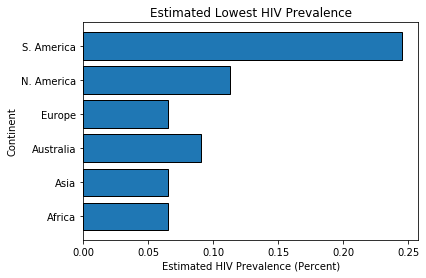

In [7]:
#creates a bar chart showing the lowest HIV prevalence of each continent
plt.barh(x, y_lowest)
plt.plot()

plt.ylabel("Continent")
plt.xlabel("Estimated HIV Prevalence (Percent)")
plt.title("Estimated Lowest HIV Prevalence")

plt.show()

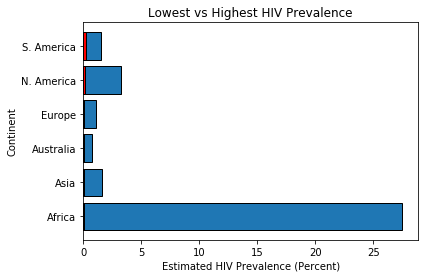

In [8]:
#creates an overlayed bar chart showing the lowest vs highest HIV prevalence of each continent
plt.barh(x, y_highest)
plt.plot()

plt.barh(x, y_lowest, color = 'r')
plt.plot()

plt.ylabel("Continent")
plt.xlabel("Estimated HIV Prevalence (Percent)")
plt.title("Lowest vs Highest HIV Prevalence")

plt.show()

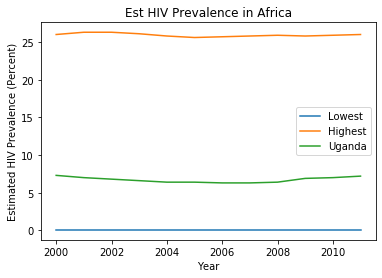

In [9]:
import numpy as np

#creates an array with the years 2000 - 2011
year = np.arange(2000, 2012)

#creates a table of African countries
hiv_est_africa_year = hiv_est_con.where('Continent', are.equal_to('Africa'))

#excludes empty data entries
hiv_est_africa_year = hiv_est_africa_year.where('2000', are.above(0))
hiv_est_africa_year = hiv_est_africa_year.where('2011', are.above(0))

#creates arrays for the lowest and highest prevalence for each year
lowest = np.arange(12.0)
highest = np.arange(12.0)

#loops through the African countries to find the lowest HIV prevalence for each year
i = 0
for x in year :
  hiv_est_africa_year = hiv_est_africa_year.sort(str(x))
  lowest[i] = hiv_est_africa_year.column(str(x)).item(0)
  i = i + 1

#loops through the African countries to find the highest HIV prevalence for each year
j = 0
for x in year :
  hiv_est_africa_year = hiv_est_africa_year.sort(str(x), descending=True)
  highest[j] = hiv_est_africa_year.column(str(x)).item(0)
  j = j + 1

#creates an array and loops through to find Uganda's data for each year
uganda = np.arange(12.0)
k = 0  
for x in year :
  uganda[k] = hiv_est_africa_year.where('Country', are.equal_to('Uganda')).column(str(x))
  k = k + 1

#plots a line plot showing the lowest, highest, and Uganda's HIV prevalence percentage
plt.plot(year, lowest, label='Lowest')
plt.plot(year, highest, label = 'Highest')
plt.plot(year, uganda, label = 'Uganda')

plt.ylabel("Estimated HIV Prevalence (Percent)")
plt.xlabel("Year")
plt.title("Est HIV Prevalence in Africa")

plt.legend()
plt.show()

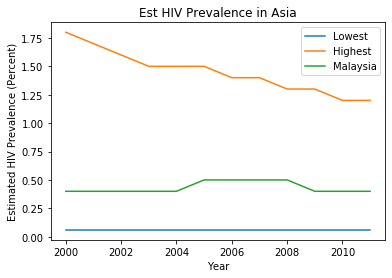

In [10]:
#creates a table of Asian countries
hiv_est_asia_year = hiv_est_con.where('Continent', are.equal_to('Asia'))

#excludes empty data entries
hiv_est_asia_year = hiv_est_asia_year.where('2000', are.above(0))
hiv_est_asia_year = hiv_est_asia_year.where('2011', are.above(0))

#creates arrays for the lowest and highest prevalence for each year
lowest = np.arange(12.0)
highest = np.arange(12.0)

#loops through the Asian countries to find the lowest HIV prevalence for each year
i = 0
for x in year :
  hiv_est_asia_year = hiv_est_asia_year.sort(str(x))
  lowest[i] = hiv_est_asia_year.column(str(x)).item(0)
  i = i + 1

#loops through the Asian countries to find the highest HIV prevalence for each year
j = 0
for x in year :
  hiv_est_asia_year = hiv_est_asia_year.sort(str(x), descending=True)
  highest[j] = hiv_est_asia_year.column(str(x)).item(0)
  j = j + 1

#creates an array and loops through to find Thailand's data for each year
malaysia = np.arange(12.0)
k = 0  
for x in year :
  malaysia[k] = hiv_est_asia_year.where('Country', are.equal_to('Malaysia')).column(str(x))
  k = k + 1

#plots a line plot showing the lowest, highest, and Malaysia's HIV prevalence percentage
plt.plot(year, lowest, label='Lowest')
plt.plot(year, highest, label = 'Highest')
plt.plot(year, malaysia, label = 'Malaysia')

plt.ylabel("Estimated HIV Prevalence (Percent)")
plt.xlabel("Year")
plt.title("Est HIV Prevalence in Asia")

plt.legend()
plt.show()

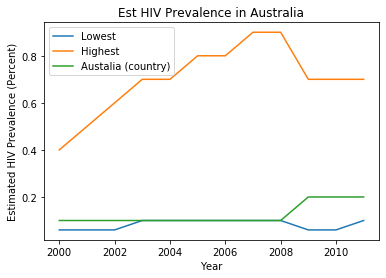

In [11]:
#creates a table of Australian countries
hiv_est_aus_year = hiv_est_con.where('Continent', are.equal_to('Australia'))

#excludes empty data entries
hiv_est_aus_year = hiv_est_aus_year.where('2000', are.above(0))
hiv_est_aus_year = hiv_est_aus_year.where('2011', are.above(0))

#creates arrays for the lowest and highest prevalence for each year
lowest = np.arange(12.0)
highest = np.arange(12.0)

#loops through the Australian countries to find the lowest HIV prevalence for each year
i = 0
for x in year :
  hiv_est_aus_year = hiv_est_aus_year.sort(str(x))
  lowest[i] = hiv_est_aus_year.column(str(x)).item(0)
  i = i + 1

#loops through the Australian countries to find the highest HIV prevalence for each year  
j = 0
for x in year :
  hiv_est_aus_year = hiv_est_aus_year.sort(str(x), descending=True)
  highest[j] = hiv_est_aus_year.column(str(x)).item(0)
  j = j + 1

#creates an array and loops through to find Australia (country)'s data for each year
australia = np.arange(12.0)
k = 0
for x in year :
  australia[k] = hiv_est_aus_year.where('Country', are.equal_to('Australia')).column(str(x))
  k = k + 1

#plots a line plot showing the lowest, highest, and Australia (country)'s HIV prevalence percentage
plt.plot(year, lowest, label='Lowest')
plt.plot(year, highest, label = 'Highest')
plt.plot(year, australia, label = 'Austalia (country)')

plt.ylabel("Estimated HIV Prevalence (Percent)")
plt.xlabel("Year")
plt.title("Est HIV Prevalence in Australia")

plt.legend()
plt.show()

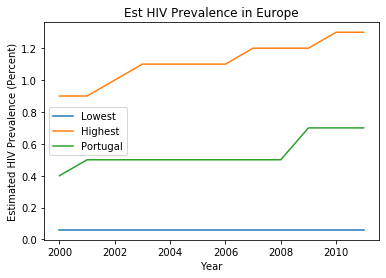

In [12]:
#creates a table of European countries
hiv_est_eu_year = hiv_est_con.where('Continent', are.equal_to('Europe'))

#excludes empty data entries
hiv_est_eu_year = hiv_est_eu_year.where('2000', are.above(0))
hiv_est_eu_year = hiv_est_eu_year.where('2011', are.above(0))

#creates arrays for the lowest and highest prevalence for each year
lowest = np.arange(12.0)
highest = np.arange(12.0)

#loops through the European countries to find the lowest HIV prevalence for each year
i = 0
for x in year :
  hiv_est_eu_year = hiv_est_eu_year.sort(str(x))
  lowest[i] = hiv_est_eu_year.column(str(x)).item(0)
  i = i + 1

#loops through the European countries to find the highest HIV prevalence for each year
j = 0
for x in year :
  hiv_est_eu_year = hiv_est_eu_year.sort(str(x), descending=True)
  highest[j] = hiv_est_eu_year.column(str(x)).item(0)
  j = j + 1

#creates an array and loops through to find Portugal's data for each year  
portugal = np.arange(12.0)
k = 0
for x in year :
  portugal[k] = hiv_est_eu_year.where('Country', are.equal_to('Portugal')).column(str(x))
  k = k + 1

#plots a line plot showing the lowest, highest, and Portugal's HIV prevalence percentage
plt.plot(year, lowest, label='Lowest')
plt.plot(year, highest, label = 'Highest')
plt.plot(year, portugal, label = 'Portugal')

plt.ylabel("Estimated HIV Prevalence (Percent)")
plt.xlabel("Year")
plt.title("Est HIV Prevalence in Europe")

plt.legend()
plt.show()

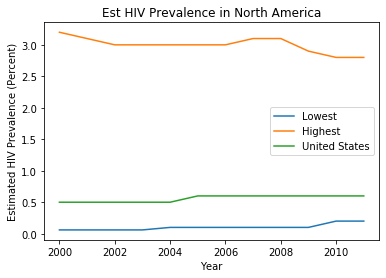

In [13]:
#creates a table of North American countries
hiv_est_na_year = hiv_est_con.where('Continent', are.equal_to('North America'))

#excludes empty data entries
hiv_est_na_year = hiv_est_na_year.where('2000', are.above(0))
hiv_est_na_year = hiv_est_na_year.where('2011', are.above(0))

#creates arrays for the lowest and highest prevalence for each year
lowest = np.arange(12.0)
highest = np.arange(12.0)

#loops through the North American countries to find the lowest HIV prevalence for each year
i = 0
for x in year :
  hiv_est_na_year = hiv_est_na_year.sort(str(x))
  lowest[i] = hiv_est_na_year.column(str(x)).item(0)
  i = i + 1
  
#loops through the North American countries to find the highest HIV prevalence for each year
j = 0
for x in year :
  hiv_est_na_year = hiv_est_na_year.sort(str(x), descending=True)
  highest[j] = hiv_est_na_year.column(str(x)).item(0)
  j = j + 1
  
#creates an array and loops through to find United States' data for each year
us = np.arange(12.0)
k = 0 
for x in year :
  us[k] = hiv_est_na_year.where('Country', are.equal_to('United States')).column(str(x))
  k = k + 1

#plots a line plot showing the lowest, highest, and United States' HIV prevalence percentage
plt.plot(year, lowest, label='Lowest')
plt.plot(year, highest, label = 'Highest')
plt.plot(year, us, label = 'United States')

plt.ylabel("Estimated HIV Prevalence (Percent)")
plt.xlabel("Year")
plt.title("Est HIV Prevalence in North America")

plt.legend()
plt.show()

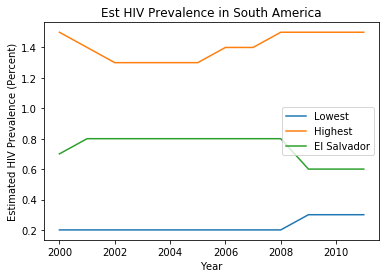

In [14]:
#creates a table of South American countries
hiv_est_sa_year = hiv_est_con.where('Continent', are.equal_to('South America'))

#excludes empty data entries
hiv_est_sa_year = hiv_est_sa_year.where('2000', are.above(0))
hiv_est_sa_year = hiv_est_sa_year.where('2011', are.above(0))

#creates arrays for the lowest and highest prevalence for each year
lowest = np.arange(12.0)
highest = np.arange(12.0)

#loops through the South American countries to find the lowest HIV prevalence for each year
i = 0
for x in year :
  hiv_est_sa_year = hiv_est_sa_year.sort(str(x))
  lowest[i] = hiv_est_sa_year.column(str(x)).item(0)
  i = i + 1

#loops through the South American countries to find the highest HIV prevalence for each year  
j = 0
for x in year :
  hiv_est_sa_year = hiv_est_sa_year.sort(str(x), descending=True)
  highest[j] = hiv_est_sa_year.column(str(x)).item(0)
  j = j + 1

#creates an array and loops through to find El Salvador's data for each year  
el_salvador = np.arange(12.0)
k = 0  
for x in year :
  el_salvador[k] = hiv_est_sa_year.where('Country', are.equal_to('El Salvador')).column(str(x))
  k = k + 1

#plots a line plot showing the lowest, highest, and El Salvador's HIV prevalence percentage  
plt.plot(year, lowest, label='Lowest')
plt.plot(year, highest, label = 'Highest')
plt.plot(year, el_salvador, label = 'El Salvador')

plt.ylabel("Estimated HIV Prevalence (Percent)")
plt.xlabel("Year")
plt.title("Est HIV Prevalence in South America")

plt.legend()
plt.show()

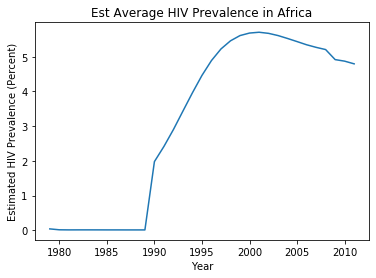

In [15]:
#function to find the yearly average HIV prevalence
def year_avg(array_x) :
  sum = 0
  i = 0
  for x in array_x :
    if x > 0 :
      sum += x
      i += 1
  if i == 0 :  #excludes empty data entries
    return(0.0)
  avg = sum/i
  return(avg)

#creates an array of years 1979 - 2011
year = np.arange(1979, 2012)

#creates an array for the averages of African countries
africa_avgs = np.arange(33.0)

#loops through to find the yearly averages for African countries
i = 0
for x in year :
  africa_avgs[i] = year_avg(hiv_est_con.where('Continent', are.equal_to('Africa')).column(str(x)))
  #if a year's avg is empty, gets the avg from the previous year to more accurately display the graph
  if africa_avgs[i] == 0 and i != 0 : 
    africa_avgs[i] = africa_avgs[i-1]
  i += 1

#plots a line plot of the yearly avgs of African countries' HIV prevalence
plt.plot(year, africa_avgs)

plt.ylabel("Estimated HIV Prevalence (Percent)")
plt.xlabel("Year")
plt.title("Est Average HIV Prevalence in Africa")

plt.show()

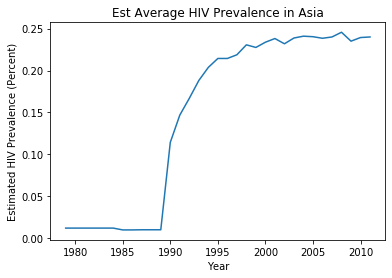

In [16]:
#creates an array for the averages of Asian countries
asia_avgs = np.arange(33.0)

#loops through to find the yearly averages for Asian countries
i = 0
for x in year :
  asia_avgs[i] = year_avg(hiv_est_con.where('Continent', are.equal_to('Asia')).column(str(x)))
  #if a year's avg is empty, gets the avg from the previous year to more accurately display the graph
  if asia_avgs[i] == 0 and i != 0 :
    asia_avgs[i] = asia_avgs[i-1]
  i += 1

#plots a line plot of the yearly avgs of Asian countries' HIV prevalence
plt.plot(year, asia_avgs)

plt.ylabel("Estimated HIV Prevalence (Percent)")
plt.xlabel("Year")
plt.title("Est Average HIV Prevalence in Asia")

plt.show()

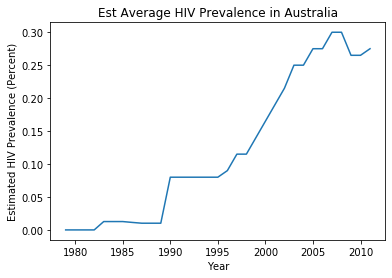

In [17]:
#creates an array for the averages of Australian countries
aus_avgs = np.arange(33.0)

#loops through to find the yearly averages for Australian countries
i = 0
for x in year :
  aus_avgs[i] = year_avg(hiv_est_con.where('Continent', are.equal_to('Australia')).column(str(x)))
  #if a year's avg is empty, gets the avg from the previous year to more accurately display the graph
  if aus_avgs[i] == 0 and i != 0 :
    aus_avgs[i] = aus_avgs[i-1]
  i += 1

#plots a line plot of the yearly avgs of Australian countries' HIV prevalence
plt.plot(year, aus_avgs)

plt.ylabel("Estimated HIV Prevalence (Percent)")
plt.xlabel("Year")
plt.title("Est Average HIV Prevalence in Australia")

plt.show()

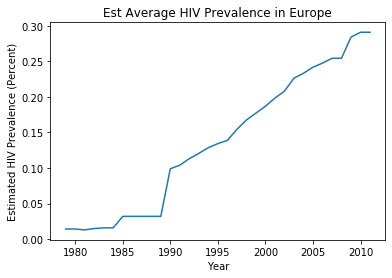

In [18]:
#creates an array for the averages of European countries
eu_avgs = np.arange(33.0)

#loops through to find the yearly averages for European countries
i = 0
for x in year :
  eu_avgs[i] = year_avg(hiv_est_con.where('Continent', are.equal_to('Europe')).column(str(x)))
  #if a year's avg is empty, gets the avg from the previous year to more accurately display the graph
  if eu_avgs[i] == 0 and i != 0 :
    eu_avgs[i] = eu_avgs[i-1]
  i += 1

#plots a line plot of the yearly avgs of European countries' HIV prevalence
plt.plot(year, eu_avgs)

plt.ylabel("Estimated HIV Prevalence (Percent)")
plt.xlabel("Year")
plt.title("Est Average HIV Prevalence in Europe")

plt.show()

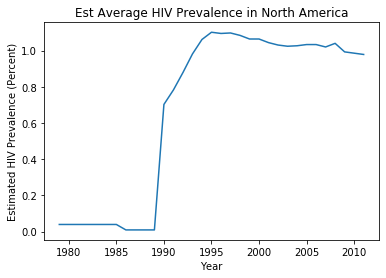

In [19]:
#creates an array for the averages of North American countries
na_avgs = np.arange(33.0)

#loops through to find the yearly averages for North American countries
i = 0
for x in year :
  na_avgs[i] = year_avg(hiv_est_con.where('Continent', are.equal_to('North America')).column(str(x)))
  #if a year's avg is empty, gets the avg from the previous year to more accurately display the graph
  if na_avgs[i] == 0 and i != 0 :
    na_avgs[i] = na_avgs[i-1]
  i += 1

#plots a line plot of the yearly avgs of North American countries' HIV prevalence
plt.plot(year, na_avgs)

plt.ylabel("Estimated HIV Prevalence (Percent)")
plt.xlabel("Year")
plt.title("Est Average HIV Prevalence in North America")

plt.show()

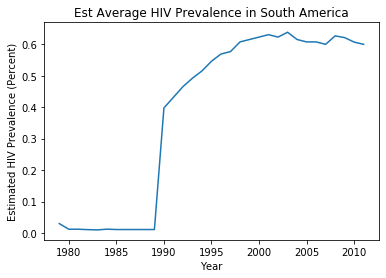

In [20]:
#creates an array for the averages of South American countries
sa_avgs = np.arange(33.0)

#loops through to find the yearly averages for South American countries
i = 0
for x in year :
  sa_avgs[i] = year_avg(hiv_est_con.where('Continent', are.equal_to('South America')).column(str(x)))
  #if a year's avg is empty, gets the avg from the previous year to more accurately display the graph
  if sa_avgs[i] == 0 and i != 0 :
    sa_avgs[i] = sa_avgs[i-1]
  i += 1

#plots a line plot of the yearly avgs of South American countries' HIV prevalence
plt.plot(year, sa_avgs)

plt.ylabel("Estimated HIV Prevalence (Percent)")
plt.xlabel("Year")
plt.title("Est Average HIV Prevalence in South America")

plt.show()

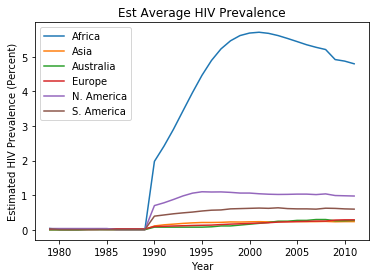

In [21]:
#plots an overlayed line chart of the HIV prevalence avgs from 1979 to 2011 by continent
plt.plot(year, africa_avgs, label = 'Africa')
plt.plot(year, asia_avgs, label = 'Asia')
plt.plot(year, aus_avgs, label = 'Australia')
plt.plot(year, eu_avgs, label = 'Europe')
plt.plot(year, na_avgs, label = 'N. America')
plt.plot(year, sa_avgs, label = 'S. America')

plt.ylabel("Estimated HIV Prevalence (Percent)")
plt.xlabel("Year")
plt.title("Est Average HIV Prevalence")

plt.legend()
plt.show()

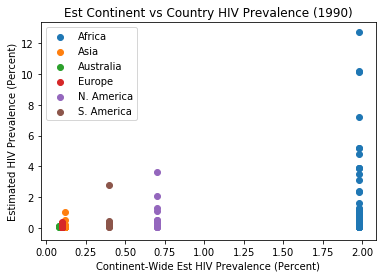

In [22]:
#retrieves the data for the HIV prevalence percentages of each country in 1990
#the data is divded into arrays by continent
africa_scatter1990 = hiv_est_con.where('Continent', are.equal_to('Africa')).where('1990', are.above(0)).column('1990')
asia_scatter1990 = hiv_est_con.where('Continent', are.equal_to('Asia')).where('1990', are.above(0)).column('1990')
aus_scatter1990 = hiv_est_con.where('Continent', are.equal_to('Australia')).where('1990', are.above(0)).column('1990')
eu_scatter1990 = hiv_est_con.where('Continent', are.equal_to('Europe')).where('1990', are.above(0)).column('1990')
na_scatter1990 = hiv_est_con.where('Continent', are.equal_to('North America')).where('1990', are.above(0)).column('1990')
sa_scatter1990 = hiv_est_con.where('Continent', are.equal_to('South America')).where('1990', are.above(0)).column('1990')

#creates arrays, the length of the repective arrays from above, filled with the avg 
#HIV prevalence percentages for each continent in 1990
africa_x = np.full(len(africa_scatter1990), africa_avgs[11])
asia_x = np.full(len(asia_scatter1990), asia_avgs[11])
aus_x = np.full(len(aus_scatter1990), aus_avgs[11])
eu_x = np.full(len(eu_scatter1990), eu_avgs[11])
na_x = np.full(len(na_scatter1990), na_avgs[11])
sa_x = np.full(len(sa_scatter1990), sa_avgs[11])

#plots a scatter plot of avg hiv prevalence percentage by continent vs 
#each country's individual prevalence precentage in 1990
plt.scatter(africa_x, africa_scatter1990, label='Africa')
plt.scatter(asia_x, asia_scatter1990, label='Asia')
plt.scatter(aus_x,aus_scatter1990, label='Australia')
plt.scatter(eu_x,eu_scatter1990, label='Europe')
plt.scatter(na_x,na_scatter1990, label='N. America')
plt.scatter(sa_x,sa_scatter1990, label='S. America')

plt.ylabel("Estimated HIV Prevalence (Percent)")
plt.xlabel("Continent-Wide Est HIV Prevalence (Percent)")
plt.title("Est Continent vs Country HIV Prevalence (1990)")

plt.legend()
plt.show()

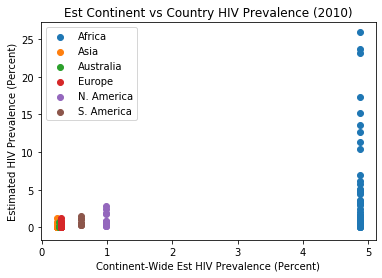

In [25]:
#retrieves the data for the HIV prevalence percentages of each country in 2010
#the data is divded into arrays by continent
africa_scatter2010 = hiv_est_con.where('Continent', are.equal_to('Africa')).where('2010', are.above(0)).column('2010')
asia_scatter2010 = hiv_est_con.where('Continent', are.equal_to('Asia')).where('2010', are.above(0)).column('2010')
aus_scatter2010 = hiv_est_con.where('Continent', are.equal_to('Australia')).where('2010', are.above(0)).column('2010')
eu_scatter2010 = hiv_est_con.where('Continent', are.equal_to('Europe')).where('2010', are.above(0)).column('2010')
na_scatter2010 = hiv_est_con.where('Continent', are.equal_to('North America')).where('2010', are.above(0)).column('2010')
sa_scatter2010 = hiv_est_con.where('Continent', are.equal_to('South America')).where('2010', are.above(0)).column('2010')

#creates arrays, the length of the repective arrays from above, filled with the avg 
#HIV prevalence percentages for each continent in 2010
africa_x = np.full(len(africa_scatter2010), africa_avgs[31])
asia_x = np.full(len(asia_scatter2010), asia_avgs[31])
aus_x = np.full(len(aus_scatter2010), aus_avgs[31])
eu_x = np.full(len(eu_scatter2010), eu_avgs[31])
na_x = np.full(len(na_scatter2010), na_avgs[31])
sa_x = np.full(len(sa_scatter2010), sa_avgs[31])

#plots a scatter plot of avg hiv prevalence percentage by continent vs 
#each country's individual prevalence precentage in 2010
plt.scatter(africa_x, africa_scatter2010, label='Africa')
plt.scatter(asia_x, asia_scatter2010, label='Asia')
plt.scatter(aus_x,aus_scatter2010, label='Australia')
plt.scatter(eu_x,eu_scatter2010, label='Europe')
plt.scatter(na_x,na_scatter2010, label='N. America')
plt.scatter(sa_x,sa_scatter2010, label='S. America')

plt.ylabel("Estimated HIV Prevalence (Percent)")
plt.xlabel("Continent-Wide Est HIV Prevalence (Percent)")
plt.title("Est Continent vs Country HIV Prevalence (2010)")

plt.legend()
plt.show()